# Read Image

- image = cv2.imread( 'img/road.bmp', cv2.IMREAD_GRAYSCALE )
-
- plt.title( 'Original Image' )
- plt.imshow( image, cmap='gray', vmin=0, vmax=255 )
-
- from google.colab.patches import cv2_imshow
- cv2_imshow(image)
- plt.imshow(image)
-
- cv2.imwrite( 'testing_save.png', image )

# Plot image using subplot

- fig = plt.figure(figsize=(8,8))
- ax1 = fig.add_subplot(121)
- ax1.imshow( image, cmap='gray', vmin=0, vmax=255 )
- ax1.title.set_text('Original Image')
- plt.show()
-
- image.shape
- image.size
- image.ndim
- type(image)
-
- height = image.shape[0]
- width = image.shape[1]
- num_channels = image.shape[2]
-
- b, g, r = cv2.split(image)
- rgb_image = cv2.merge((r, g, b))
- num_red_pixels = cv2.countNonZero(r)
-
- rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
- resized_img = cv2.resize(image, (512,256), interpolation = cv2.INTER_LINEAR)

# Other

- kernel = np.ones( (3,3), np.uint8 )
-
- min_filtered = cv2.erode( output_image, kernel )
- max_filtered = cv2.dilate(image, kernel)
- median_filtered = cv2.medianBlur( image, 3)
- weighted_filter = cv2.filter2D(image, -1, kernel)
- kernel = kernel / np.sum(kernel)
- gaussian_filter = cv2.GaussianBlur(image, (3,3), 0)
-
- np.max(neighborhood)
- np.min(neighborhood)
- np.median(neighborhood)
-
- output_image_minfiltering = np.zeros_like(output_image)
- padded_image = cv2.copyMakeBorder(output_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
- output_image_minfiltering = np.zeros_like(output_image)

# Min-Max-contrast-streching:

- r1, r2 = image.min(), image.max()
- s1, s2 = 0, 255
- output_image[i,j] = ( image[i,j] - R1_image.min() ) \* ( ( S2_new_max - S1_new_min ) / ( R2_image.max() - R1_image.min() ) ) + new_min

# Negative Transformation Formula

- negative = 255 - image

# Log Transformation

- c = round( 255 / np.log( 1 + np.max(image) ) )
- log_image = c \* ( np.log(1+image) )
- log_image = np.array( log_image, dtype = np.uint8 )

# Gama Correction

- gamma_image = np.zeros_like(image)
- gamma = 0.5
- c = 255 / (255 \*\* gamma)
- corrected_value = c \* (pixel_value \*\* gamma)

# Image Thresholding

- if image[i,j] >= thresh_value:
-            binary[i,j] = 255
- else:
-            binary[i,j] = 0

# Intensity Level Slicing

- if image[i,j] > minimum_range and image[i,j] < maximum_range:
- output_image[i,j] = 255
- else:
- output_image[i,j] = 0 # image[i,j] for second case

#### identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)


In [ ]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1. Print size of the image


Original Image Shape: (256, 256) 
Image size: 256*256 =65536


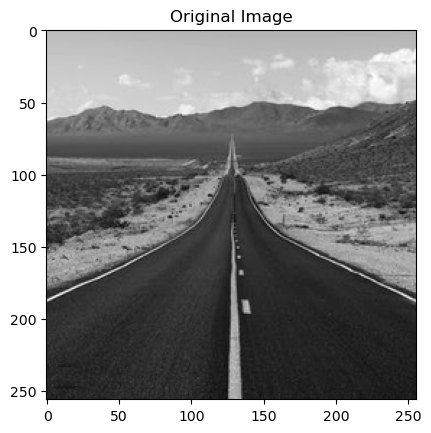

In [2]:
image = cv2.imread('img/road.bmp', cv2.IMREAD_GRAYSCALE)
plt.title('Original Image')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
print('Original Image Shape:', image.shape, f"\nImage size: {image.shape[0]}*{image.shape[1]} ={image.shape[0]*image.shape[1]}")

## 2. Min-Max Contrast streching


image.min(): 7
image.max(): 255


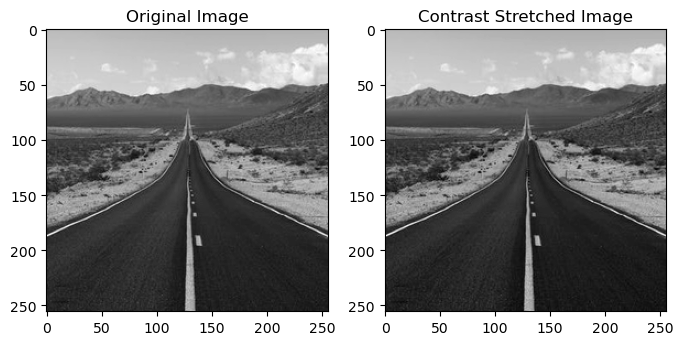

In [3]:
r1, r2 = image.min(), image.max()
print('image.min():', r1)
print('image.max():', r2)
s1, s2 = 0, 255

# Apply the linear transformation using a for loop
output_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        output_image[i,j] = (image[i,j] - r1) * ((s2 - s1) / (r2 - r1)) + s1
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Contrast Stretched Image')
plt.show()

### Min filtering on the Min-Max


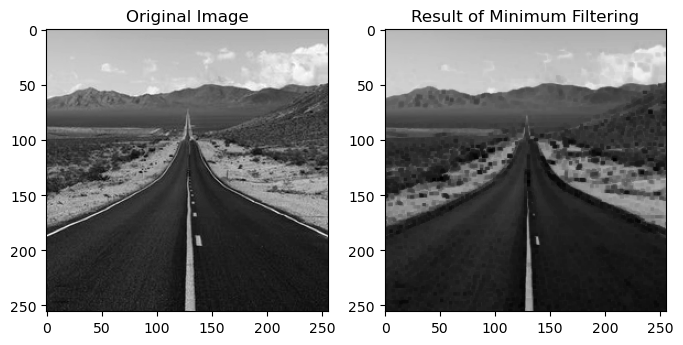

In [4]:
kernel = np.ones((3,3),np.uint8)
# Perform maximum filtering convolution using dilation
min_filtered = cv2.erode(output_image, kernel)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(min_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Minimum Filtering')

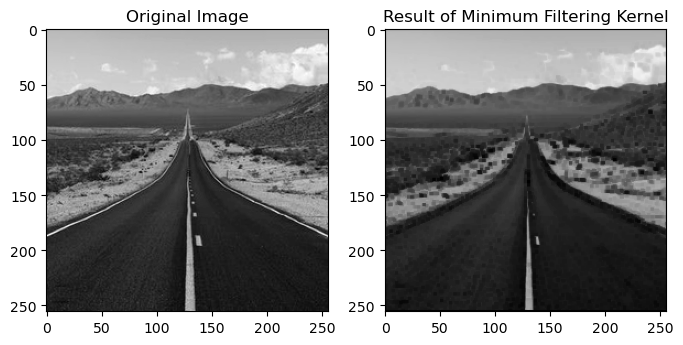

In [5]:
# Pad the image using cv2.copyMakeBorder
padded_image = cv2.copyMakeBorder(output_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image_minfiltering = np.zeros_like(output_image)

# Apply the filter using for loops
for i in range(1, padded_image.shape[0]-1):
    for j in range(1, padded_image.shape[1]-1):
        # Extract the 3x3 neighborhood around the current pixel
        neighborhood = padded_image[i-1:i+2, j-1:j+2]

        # Compute the maximum value in the neighborhood
        minimum = np.min(neighborhood)

        # Set the corresponding pixel in the output image to the maximum value
        output_image_minfiltering[i-1, j-1] = minimum
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image_minfiltering, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Minimum Filtering Kernel')